In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assignment1

In [2]:
yos2_bgr = cv2.imread('./yosemite/yosemite2.jpg')

In [3]:
yos2_bgr.shape

(480, 640, 3)

In [4]:
yos2_gray = cv2.cvtColor(yos2_bgr, cv2.COLOR_BGR2GRAY)
yos2_gray = cv2.resize(yos2_gray,(yos2_gray.shape[1],480))

In [5]:
yos2_gray.shape

(480, 640)

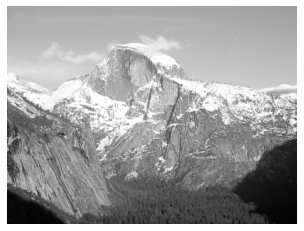

In [6]:
plt.figure(figsize=(10,4))
plt.imshow(yos2_gray,cmap='gray')
plt.axis('off')
plt.show()

In [7]:
sift =cv2.SIFT_create()


In [8]:
pts, des= sift.detectAndCompute(yos2_gray,None)

In [9]:
img2=cv2.drawKeypoints(yos2_gray,pts,None,color=(0, 255, 0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

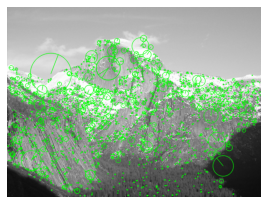

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img2)
plt.axis('off')
plt.show()

# Assignment2

In [11]:
yos1_bgr = cv2.imread('./yosemite/yosemite1.jpg')
yos1_rgb =  cv2.cvtColor(yos1_bgr, cv2.COLOR_BGR2RGB)
yos2_bgr = cv2.imread('./yosemite/yosemite2.jpg')
yos2_rgb = cv2.cvtColor(yos2_bgr, cv2.COLOR_BGR2RGB)

In [12]:
yos2_rgb.shape,yos1_rgb.shape

((480, 640, 3), (480, 640, 3))

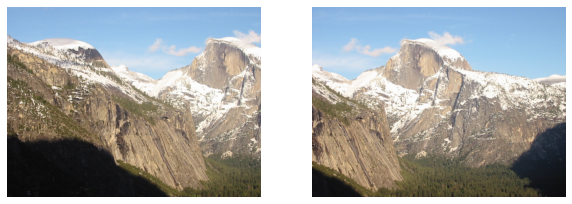

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(yos1_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(yos2_rgb)
plt.axis('off')

plt.show()

In [14]:
sift =cv2.SIFT_create()

In [15]:
pts1, des1 = sift.detectAndCompute(yos1_rgb,None)
pts2, des2 = sift.detectAndCompute(yos2_rgb,None)

In [16]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

In [17]:
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

In [18]:
MIN_MATCH_COUNT = 10

In [19]:
query_pts = np.float32([pts1[m.queryIdx].pt for m in matches[:10]]).reshape(-1,1,2)
train_pts = np.float32([pts2[m.trainIdx].pt for m in matches[:10]]).reshape(-1,1,2)

In [20]:
matrix, mask = cv2.findHomography(query_pts,train_pts, cv2.RANSAC, 5.0)

In [21]:
im_out_img1 = cv2.warpPerspective(yos1_rgb,matrix, (yos1_rgb.shape[1] , yos2_rgb.shape[0]))

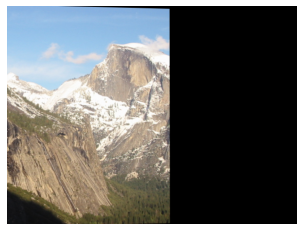

In [22]:
plt.figure(figsize=(10,4))
plt.imshow(im_out_img1)
plt.axis('off')
plt.show()

In [23]:
matches_ = bf.match(des2,des1)
matches_ = sorted(matches_, key = lambda x:x.distance)

In [24]:
query_pts = np.float32([pts2[m.queryIdx].pt for m in matches_[:10]]).reshape(-1,1,2)
train_pts = np.float32([pts1[m.trainIdx].pt for m in matches_[:10]]).reshape(-1,1,2)

In [25]:
matrix_, mask_ = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
im_out_img2 = cv2.warpPerspective(yos2_rgb, matrix, (yos2_rgb.shape[1], yos1_rgb.shape[0]))

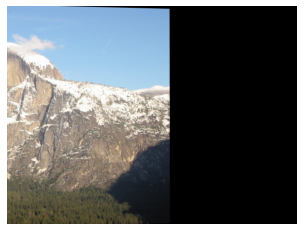

In [26]:
plt.figure(figsize=(10,4))
plt.imshow(im_out_img2)
plt.axis('off')
plt.show()

In [27]:
img3 = cv2.drawMatches(yos1_rgb,pts1,yos2_rgb,pts2,matches[:10],None,flags=2)

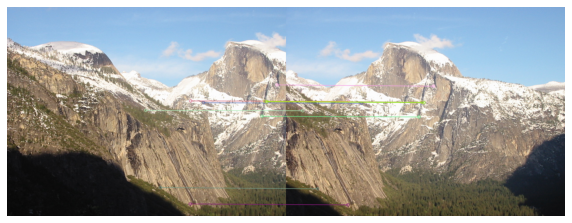

In [28]:
plt.figure(figsize=(10,4))
plt.imshow(img3)
plt.axis('off')
plt.show()

# Assignment 3

In [29]:
def warpImages_add(img1, img2):
    plt.show()


    sift = cv2.SIFT_create()
    pts1, des1 = sift.detectAndCompute(img1, None)
    pts2, des2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches_ = bf.match(des2, des1)

    matches_ = sorted(matches_, key=lambda x: x.distance)
    query_pts = np.float32([pts2[m.queryIdx].pt for m in matches_[:10]]).reshape(-1, 1, 2)
    train_pts = np.float32([pts1[m.trainIdx].pt for m in matches_[:10]]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]


    list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1,rows1], [cols1,0]]).reshape(-1,1,2)
    temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)
    list_of_points_2 = cv2.perspectiveTransform(temp_points, matrix)
    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
    translation_dist = [-x_min, -y_min]
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])

    output_img = np.float32(cv2.warpPerspective(img2
                                                , H_translation.dot(matrix), (x_max-x_min, y_max-y_min)))


    output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] += np.float32(img1)

    output_img = output_img / 2

    return output_img.astype(np.uint8)

In [30]:
def warpImages(img1, img2):
    sift = cv2.SIFT_create()
    pts1, des1 = sift.detectAndCompute(img1, None)
    pts2, des2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches_ = bf.match(des2, des1)

    matches_ = sorted(matches_, key=lambda x: x.distance)
    query_pts = np.float32([pts2[m.queryIdx].pt for m in matches_[:10]]).reshape(-1, 1, 2)
    train_pts = np.float32([pts1[m.trainIdx].pt for m in matches_[:10]]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1,rows1], [cols1,0]]).reshape(-1,1,2)
    temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)
    list_of_points_2 = cv2.perspectiveTransform(temp_points, matrix)
    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(matrix), (x_max-x_min, y_max-y_min))
    output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img1

    return output_img

In [31]:
result = warpImages_add(yos1_rgb,yos2_rgb)

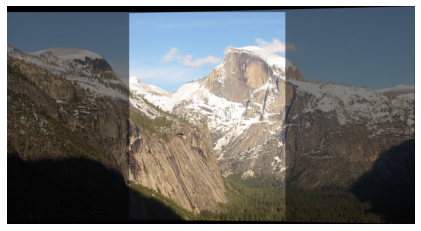

In [32]:
plt.figure(figsize=(10,4))
plt.imshow(result)
plt.axis('off')
plt.show()

In [33]:
result_2 = warpImages(yos1_rgb,yos2_rgb)

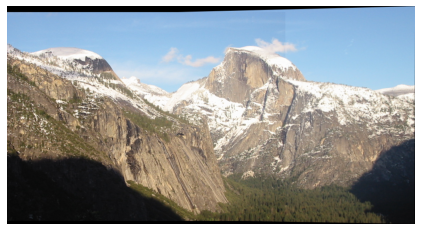

In [34]:
plt.figure(figsize=(10,4))
plt.imshow(result_2)
plt.axis('off')
plt.show()

In [35]:
from scipy import ndimage as sc

In [36]:
def get_distance_transform(img_rgb):

    thresh = cv2.threshold(img_rgb,0,255,cv2.THRESH_BINARY)[1]

    thresh = thresh.any(axis = 2)

    thresh = np.pad(thresh,1)

    dist = sc.distance_transform_edt(thresh)[1:-1,1:-1]

    dist = dist [: , : , None ]

    return np.float32(dist / dist.max())

In [37]:
dnorm = get_distance_transform(im_out_img1)

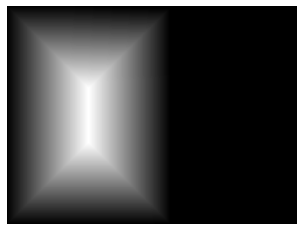

In [38]:
plt.figure(figsize=(10,4))
plt.imshow(dnorm,cmap='gray')
plt.axis('off')
plt.show()

In [39]:
# try it with mask

In [40]:
def img_blending_fill(img1, img2):
    sift = cv2.SIFT_create()


    pts1, des1 = sift.detectAndCompute(img1, None)
    pts2, des2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    query_pts = np.float32([pts1[m.queryIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)
    train_pts = np.float32([pts2[m.trainIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
    im_out_img1 = cv2.warpPerspective(img1, matrix, (img1.shape[1], img2.shape[0]))

    #if im_out_img1.shape != im.shape:
    #raise ValueError("Input images must have the same size.")

    output = im_out_img1
    loc = (im_out_img1 == 0)

    output[loc] = img2[loc]
    return output

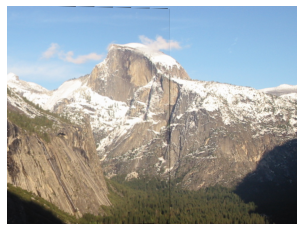

In [41]:
fill_img = img_blending_fill(yos1_rgb, yos2_rgb)
plt.figure(figsize=(10, 4))
plt.imshow(fill_img)
plt.axis('off')
plt.show()

In [42]:
def img_blending_withdist(img1, img2):
    sift = cv2.SIFT_create()


    pts1, des1 = sift.detectAndCompute(img1, None)
    pts2, des2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    query_pts = np.float32([pts1[m.queryIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)
    train_pts = np.float32([pts2[m.trainIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
    im_out_img1 = cv2.warpPerspective(img1, matrix, (img1.shape[1], img2.shape[0]))

    #if im_out_img1.shape != im.shape:
        #raise ValueError("Input images must have the same size.")


    dnorm = np.float32(get_distance_transform(im_out_img1))

    #blended_image = im_out_img1.astype(np.float32) / np.maximum(dnorm,1.0)
    blended_image = dnorm * im_out_img1.astype(np.float32) + (1-dnorm) * img2.astype(np.float32)

    output = np.clip(blended_image,0,255).astype(img2.dtype)
    return output


In [43]:
blend_img = img_blending_withdist(yos1_rgb,yos2_rgb)

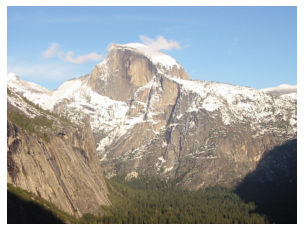

In [44]:
plt.figure(figsize=(10,4))
plt.imshow(blend_img)
plt.axis('off')
plt.show()

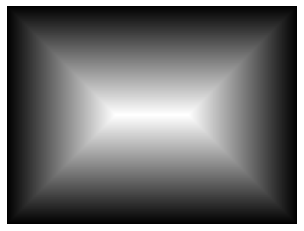

In [45]:
dnorm = get_distance_transform(blend_img)
plt.figure(figsize=(10, 4))
plt.imshow(dnorm, cmap='gray')
plt.axis('off')
plt.show()

# Assignmen4

In [46]:
def dnorm_warpImages(left_img, right_img):
    sift = cv2.SIFT_create()
    pts1, des1 = sift.detectAndCompute(left_img, None)
    pts2, des2 = sift.detectAndCompute(right_img, None)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches_ = bf.match(des2, des1)

    matches_ = sorted(matches_, key=lambda x: x.distance)
    query_pts = np.float32([pts2[m.queryIdx].pt for m in matches_[:10]]).reshape(-1, 1, 2)
    train_pts = np.float32([pts1[m.trainIdx].pt for m in matches_[:10]]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
    rows1, cols1 = left_img.shape[:2]
    rows2, cols2 = right_img.shape[:2]

    list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1,rows1], [cols1,0]]).reshape(-1,1,2)
    temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)
    list_of_points_2 = cv2.perspectiveTransform(temp_points, matrix)
    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])

    intersect_axis = np.int32(np.array(list_of_points_2).min(axis=0))[0][0]

    alpha = 0.6
    start_point = np.int32(alpha * (cols1 - intersect_axis) + intersect_axis)
    warp_img = np.float32(cv2.warpPerspective(right_img, H_translation.dot(matrix), (x_max-x_min, y_max-y_min)))
    output_img = warp_img.copy()
    #output_img = np.zeros_like(warp_img,dtype=np.float32)
    output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0],:] = left_img


    dnorm = get_distance_transform(output_img)

    whole_area_denorm = np.zeros_like(warp_img)

    whole_area_denorm += dnorm

    #dnorm[:,:start_point,:] = 1.0
    whole_area_denorm[:,:start_point,:] = 1.0


    blend_img = whole_area_denorm * output_img + (1-whole_area_denorm) * warp_img


    #blend_img[:,:281,:] =  output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0],:]
    return np.clip(blend_img,0,255).astype(img2.dtype)


In [47]:
img_stitch = dnorm_warpImages(yos1_rgb,yos2_rgb)

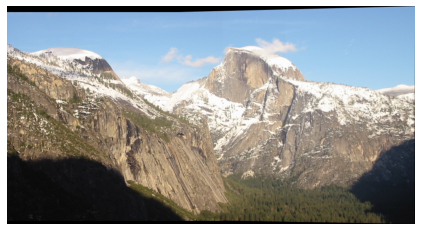

In [48]:
plt.figure(figsize=(10,4))
plt.imshow(img_stitch)
plt.axis('off')
plt.show()

In [49]:
m = get_distance_transform(img_stitch)

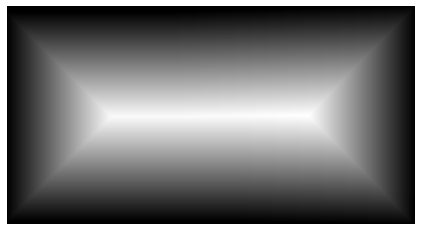

In [50]:
plt.figure(figsize=(10,4))
plt.imshow(m,cmap='gray')
plt.axis('off')
plt.show()

In [51]:
yos3_bgr = cv2.imread('./yosemite/yosemite3.jpg')
yos3_rgb =  cv2.cvtColor(yos3_bgr, cv2.COLOR_BGR2RGB)
yos4_bgr = cv2.imread('./yosemite/yosemite4.jpg')
yos4_rgb = cv2.cvtColor(yos4_bgr, cv2.COLOR_BGR2RGB)

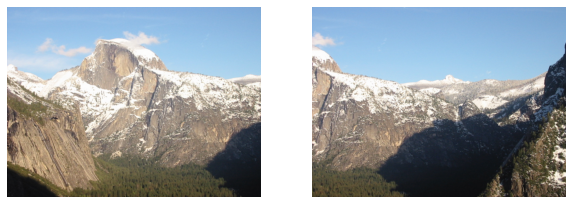

In [52]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(yos2_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(yos3_rgb)
plt.axis('off')

plt.show()

In [53]:
img_stitch = dnorm_warpImages(yos2_rgb,yos3_rgb)

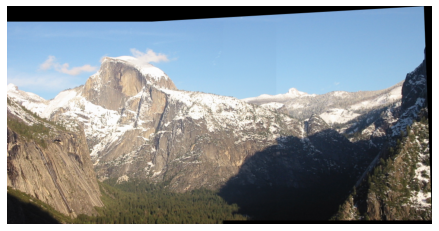

In [54]:
plt.figure(figsize=(10,4))
plt.imshow(img_stitch)
plt.axis('off')
plt.show()

In [55]:
def img_stitch(imgs):
    def dnorm_warpImages(left_img, right_img):
        sift = cv2.SIFT_create()
        pts1, des1 = sift.detectAndCompute(left_img, None)
        pts2, des2 = sift.detectAndCompute(right_img, None)
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
        matches_ = bf.match(des2, des1)

        matches_ = sorted(matches_, key=lambda x: x.distance)
        query_pts = np.float32([pts2[m.queryIdx].pt for m in matches_[:10]]).reshape(-1, 1, 2)
        train_pts = np.float32([pts1[m.trainIdx].pt for m in matches_[:10]]).reshape(-1, 1, 2)
        matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
        rows1, cols1 = left_img.shape[:2]
        rows2, cols2 = right_img.shape[:2]

        list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1,rows1], [cols1,0]]).reshape(-1,1,2)
        temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)
        list_of_points_2 = cv2.perspectiveTransform(temp_points, matrix)
        list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

        [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
        [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

        translation_dist = [-x_min, -y_min]

        H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])

        intersect_axis = np.int32(np.array(list_of_points_2).min(axis=0))[0][0]

        alpha = 0.6
        start_point = np.int32(alpha * (cols1 - intersect_axis) + intersect_axis)
        warp_img = np.float32(cv2.warpPerspective(right_img, H_translation.dot(matrix), (x_max-x_min, y_max-y_min)))
        #output_img = warp_img.copy()
        output_img = np.zeros_like(warp_img,dtype=np.float32)
        output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0],:] = left_img


        dnorm = get_distance_transform(output_img)

        whole_area_denorm = np.zeros_like(warp_img)

        whole_area_denorm += dnorm

        #dnorm[:,:start_point,:] = 1.0
        whole_area_denorm[:,:start_point,:] = 1.0


        blend_img = whole_area_denorm * output_img + (1-whole_area_denorm) * warp_img


        #blend_img[:,:281,:] =  output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0],:]
        return np.clip(blend_img,0,255).astype(img2.dtype)
    imgs_list = [[] for _ in range(len(imgs))]

    imgs_list[0] = imgs
    for i in range(1,len(imgs_list)):
        imgs_num = len(imgs_list[i-1])
        for j in range(1,imgs_num):
            img1 = imgs_list[i-1][j-1]
            img2 = imgs_list[i-1][j]

            img_stitch = dnorm_warpImages(img1,img2)
            imgs_list[i].append(img_stitch)


    last_result = imgs_list[len(imgs_list)-1][0]
    return last_result,imgs_list




In [56]:
imgs = []
imgs += [yos1_rgb,yos2_rgb,yos3_rgb,yos4_rgb]

In [57]:
result,_ = img_stitch(imgs)

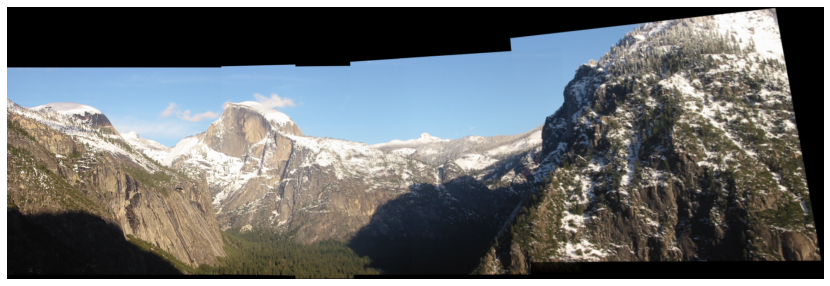

In [58]:
plt.figure(figsize=(16,5))
plt.imshow(result)
plt.axis('off')
plt.show()

# Assignment5

In [59]:
myview1_bgr = cv2.imread('./my_data/1.jpg')
myview1_rgb =  cv2.cvtColor(myview1_bgr, cv2.COLOR_BGR2RGB)
myview2_bgr = cv2.imread('./my_data/2.jpg')
myview2_rgb =  cv2.cvtColor(myview2_bgr, cv2.COLOR_BGR2RGB)
myview3_bgr = cv2.imread('./my_data/3.jpg')
myview3_rgb =  cv2.cvtColor(myview3_bgr, cv2.COLOR_BGR2RGB)
myview4_bgr = cv2.imread('./my_data/4.jpg')
myview4_rgb =  cv2.cvtColor(myview3_bgr, cv2.COLOR_BGR2RGB)


In [60]:
imgs = [myview1_rgb,myview2_rgb,myview3_rgb,myview4_rgb]

In [61]:
def image_reszie(img,height, width):

    norm_img = cv2.resize(img, (width,height))
    return norm_img

In [62]:
height_normalize = 480
width_normalize = 640

In [63]:
norm_img = image_reszie(myview1_rgb,height_normalize,width_normalize)

In [64]:
norm_img.shape

(480, 640, 3)

In [65]:
norm_img_list = [image_reszie(myview_rgb,height_normalize,width_normalize)
                 for myview_rgb in imgs
                 ]

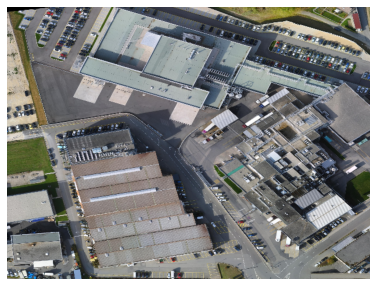

In [66]:
plt.figure(figsize=(16,5))
plt.imshow(norm_img_list[0])
plt.axis('off')

plt.show()

In [67]:
result,_ = img_stitch(norm_img_list)

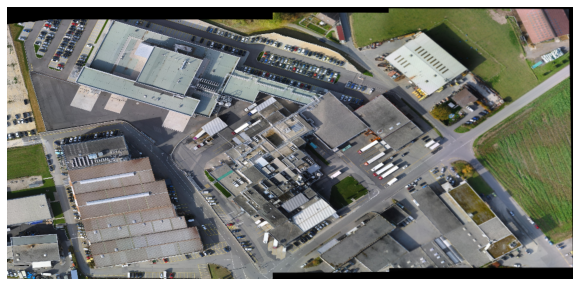

In [68]:
plt.figure(figsize=(16,5))
plt.imshow(result)
plt.axis('off')
plt.savefig('./my_data/result.png', dpi=300)
plt.show()

In [69]:
building1_bgr = cv2.imread('./my_data/building1.png')
building1_rgb =  cv2.cvtColor(building1_bgr, cv2.COLOR_BGR2RGB)
building2_bgr = cv2.imread('./my_data/building2.png')
building2_rgb =  cv2.cvtColor(building2_bgr, cv2.COLOR_BGR2RGB)
building3_bgr = cv2.imread('./my_data/building3.png')
building3_rgb =  cv2.cvtColor(building3_bgr, cv2.COLOR_BGR2RGB)
building4_bgr = cv2.imread('./my_data/building4.png')
building4_rgb =  cv2.cvtColor(building4_bgr, cv2.COLOR_BGR2RGB)

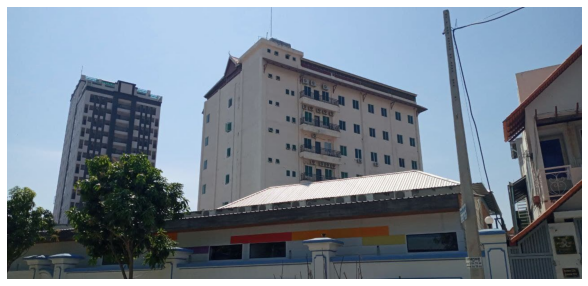

In [85]:
plt.figure(figsize=(16,5))
plt.imshow(building2_rgb)
plt.axis('off')
#plt.savefig('./my_data/result_7.png', dpi=300)
plt.show()

In [70]:
imgs = [building1_rgb,building2_rgb,building3_rgb,building4_rgb]

In [71]:
result,_ = img_stitch(imgs)

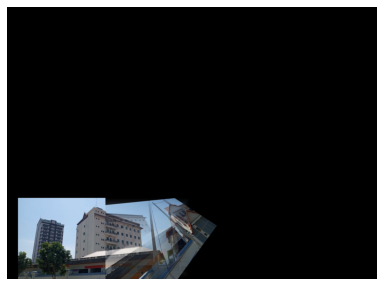

In [91]:
plt.figure(figsize=(16,5))
plt.imshow(_[1][1])
plt.axis('off')
plt.savefig('./my_data/result_8.png', dpi=300)
plt.show()